In [1]:
%load_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_90/3509738684.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [5]:

import os 
os.chdir("..")

In [6]:
from numerics.integration.steps import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numerics.utilities.misc import *

In [14]:
pars = give_def_params_discrimination(flip=0) ## H0 is the true hypothesis
params, exp_path = check_params(pars)

In [16]:
times, logliks, states1, states0, signals, covs1, covs0 =load_data_discrimination(itraj=1, total_time = 4, dt=1e-6, exp_path = exp_path)

In [17]:
l0,l1 = logliks[:,0], logliks[:,1]

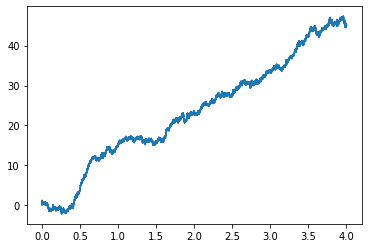

In [18]:
aa = -1
plt.plot(times[:aa], (l1-l0)[:-1][:aa])

In [19]:
def stop_time(itraj, a=-3, b=3):
    pars = give_def_params_discrimination(flip=0) ## H0 is the true hypothesis
    params, exp_path = check_params(pars)
    times, logliks, states1, states0, signals, covs1, covs0 =load_data_discrimination(itraj=itraj, total_time = 4, dt=1e-6, exp_path = exp_path)
    l0,l1 = logliks[:,0], logliks[:,1]
    log_lik_ratio = l1 - l0  ###
    stopping_time_ind =np.argmin(np.logical_and(log_lik_ratio < b, log_lik_ratio > a))
    return times[stopping_time_ind]

In [ ]:
st = []
for itraj in tqdm(range(1,1001)):
    st.append(stop_time(itraj, b=3, a=-3))

  0%|          | 5/1000 [00:11<36:15,  2.19s/it]

In [ ]:
counts, bins, bars = plt.hist(st, bins=int(len(st)/5),  density=True)

In [ ]:
def ggiulio_prob(t, b, kappa0, kappa1, eta0 , eta1, n0, n1, gamma0, gamma1):
    Su1 = n1 + 0.5 + (kappa1 / gamma1)
    Su0 = n0 + 0.5 + (kappa0 / gamma0)

    S1 = (np.sqrt(1 + (16.0*eta1*kappa1*Su1/gamma1)) - 1)*(gamma1/(8.0*eta1*kappa1))
    S0 = (np.sqrt(1 + (16.0*eta0*kappa0*Su0/gamma0)) - 1)*( gamma0/(8.0*eta0*kappa0))

    lam = gamma0 + (8*eta0*kappa0*S0)

    aa = (4*eta1*kappa1*(S1**2))/gamma1
    bb =(4*eta0*kappa0*S0**2)*(1+((16.0*eta1*kappa1*S1)/ (gamma1 + lam)) + (64.0*(eta1 * kappa1 * S1)**(2)/(gamma1 * (gamma1 + lam))))/ lam
    c =8 *(S0*S1*(eta0*kappa0 *eta1*kappa1)**(0.5)) * (gamma1+ (4.0*eta1*kappa1*S1) ) / ((gamma1 + lam)*gamma1)

    mu = 4*(eta1*kappa1*aa + (eta0*kappa0*bb) - 2*np.sqrt(eta1*kappa1*eta0*kappa0)*c)
    S= np.sqrt(2*mu)

    div = (np.sqrt(2*np.pi)*S*(t**(3/2)))
    return  abs(b)*np.exp(-((abs(b)-mu*t)**2)/(2*t*(S**2)))/div

In [ ]:
[gamma1, omega1, n1, eta1, kappa1], [gamma0, omega0, n0, eta0, kappa0] = params
gp1 = [ggiulio_prob(t, 3, kappa0, kappa1, eta0, eta1, n0, n1, gamma0,gamma1) for t in times]

In [ ]:
np.save("

array([0.03213987, 0.09010562, 0.14807138, 0.20603713, 0.2640029 ,
       0.32196862, 0.37993437, 0.43790013, 0.49586588, 0.55383164,
       0.6117974 , 0.66976315, 0.7277289 , 0.78569466, 0.84366035,
       0.9016261 , 0.95959187, 1.0175576 , 1.0755234 , 1.1334891 ],
      dtype=float32)

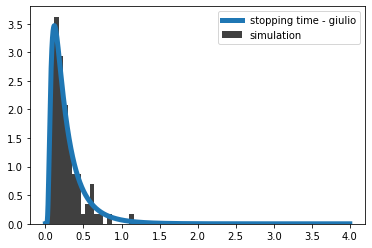

In [46]:
plt.plot(times,gp1,linewidth=5, label="stopping time - giulio")
plt.bar(.5*(bins[1:]+bins[:-1]),counts, alpha=0.75,width=bins[1]-bins[0],color="black", label="simulation")
plt.legend()

In [ ]:
[True,]

In [451]:
np.max(st), times[-1]

(0.01181, 2.0)

In [449]:
np.sum(st)/len(st)

0.0015443800687789918

In [448]:
np.std(st)

0.0011563537

In [ ]:
[gamma0, omega0, n0, eta0, kappa0], [gamma1, omega1, n1, eta1, kappa1] = params
gp0 = [giulio_prob(t, kappa0, kappa1, eta0, eta1, n0, n1, gamma0,gamma1) for t in np.linspace(0,10,100)]


In [234]:
counts/(np.sum(counts)*eps)

array([ 51.23826252, 102.47652504, 170.7942084 , 290.35015428,
       290.35015428, 375.74725848, 256.1913126 , 444.06494184,
       375.74725848, 426.985521  , 478.22378353, 375.74725848,
       597.77972941, 495.30320437, 478.22378353, 529.46204605,
       614.85915025, 461.14436268, 512.38262521, 461.14436268,
       392.82667932, 358.66783764, 307.42957512, 341.5884168 ,
       495.30320437, 290.35015428, 324.50899596, 239.11189176,
       222.03247092, 204.95305008, 273.27073344, 273.27073344,
       324.50899596, 222.03247092, 102.47652504, 290.35015428,
       102.47652504, 153.71478756, 153.71478756,  85.3971042 ,
       119.55594588,  85.3971042 ,  85.3971042 , 119.55594588,
       256.1913126 , 170.7942084 , 136.63536672, 170.7942084 ,
        68.31768336, 102.47652504, 136.63536672,  34.15884168,
        85.3971042 , 119.55594588,  68.31768336,  85.3971042 ,
       136.63536672, 119.55594588, 136.63536672, 119.55594588,
        85.3971042 , 102.47652504,  68.31768336, 102.47

<BarContainer object of 200 artists>

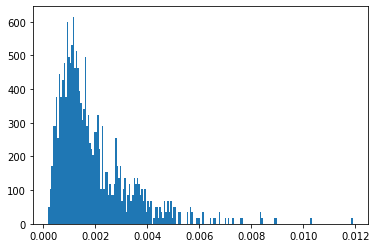

In [233]:
eps = bins[1]-bins[0]
plt.bar(bins[:-1],counts/(np.sum(counts)*eps), width=eps)


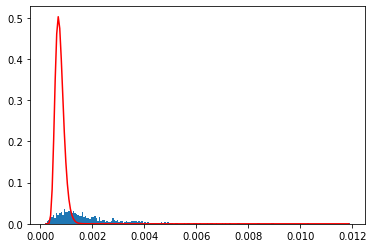

In [227]:
plt.bar(bins[:-1],counts/np.sum(counts), width=bins[1]-bins[0])
plt.plot(bins[:-1],[giulio_prob(5000*t, kappa0, kappa1, eta0, eta1, n0, n1, gamma0,gamma1) for t in bins[:-1]], color="red")

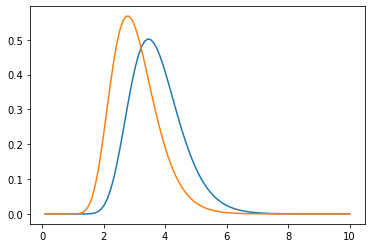

In [172]:
plt.plot(np.linspace(0,10,100),gp1)
plt.plot(np.linspace(0,10,100),gp0)

In [163]:
#### SPRT ####


stprt_stop = {}
stprt_stop["h0"] = []
stprt_stop["h1"] = []

sprt_errs = {}
sprt_errs["h0/h1"] = []
sprt_errs["h1/h0"] = []

b = 3
a = -3
for itraj in tqdm(range(1000)):
        
    pars = give_def_params_discrimination(h1true=1)
    params, exp_path = check_params(pars)
    
    times, l0, l1, states, states1, signals, covs, covs1 = load_data_discrimination(exp_path = exp_path, periods = 2, ppp=100000,itraj=itraj)
    log_lik_ratio = l0-l1
    
    ind_stop_time = np.argmin(np.logical_and(log_lik_ratio <= b, log_lik_ratio >= a))
    stprt_stop["h1"].append(times[ind_stop_time])
    
    h0 = log_lik_ratio[ind_stop_time] <= a
    sprt_errs["h0/h1"].append(int(h0))
    
    #### for the other hypothesis, flip the parameters

    pars = give_def_params_discrimination(h1true=0)
    params, exp_path = check_params(pars)
    
    times, l0, l1, states, states1, signals, covs, covs1 = load_data_discrimination(exp_path = exp_path, periods = 2, ppp=100000,itraj=itraj)
    log_lik_ratio = l0-l1
    
    ind_stop_time = np.argmin(np.logical_and(log_lik_ratio <= b, log_lik_ratio >= a))
    stprt_stop["h0"].append(times[ind_stop_time])
    
    h1 = log_lik_ratio[ind_stop_time] <= a
    sprt_errs["h1/h0"].append(int(h1))
    

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 89.83it/s]


In [164]:
np.mean(stprt_stop["h1"]), np.mean(stprt_stop["h0"])

(0.00198434, 0.00201386)

In [165]:
np.mean(sprt_errs["h0/h1"])

0.084

In [166]:
np.mean(sprt_errs["h1/h0"])

0.924

In [167]:
ind_time_sprt_avg_stop_time = np.argmin(np.abs(times - np.mean(stprt_stop["h1"])))

stprt_stop = {}
stprt_stop["h0"] = []
stprt_stop["h1"] = []

np_errs = {}
np_errs["h0/h1"] = []
np_errs["h1/h0"] = []

for itraj in tqdm(range(1000)):
        
    pars = give_def_params_discrimination(h1true=1)
    params, exp_path = check_params(pars)
    
    times, l0, l1, states, states1, signals, covs, covs1 = load_data_discrimination(exp_path = exp_path, periods = 2, ppp=100000,itraj=itraj)
    log_lik_ratio = (l0-l1)
    
    ### stand up at the equal likelihood point ---> you choose max-likelihood hypothesis!
    h0 = log_lik_ratio[ind_time_sprt_avg_stop_time] <= 0
    np_errs["h0/h1"].append(int(h0))
    
    #### for the other hypothesis, flip the parameters

    pars = give_def_params_discrimination(h1true=0)
    params, exp_path = check_params(pars)
    
    times, l0, l1, states, states1, signals, covs, covs1 = load_data_discrimination(exp_path = exp_path, periods = 2, ppp=100000,itraj=itraj)
    log_lik_ratio = (l0-l1)
    
    ### stand up at the equal likelihood point ---> you choose max-likelihood hypothesis!
    h1 = log_lik_ratio[ind_time_sprt_avg_stop_time] <= 0
    np_errs["h1/h0"].append(int(h1))
    

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 91.42it/s]


In [168]:
print(np.mean(np_errs["h0/h1"]), np.mean(np_errs["h1/h0"]))
print(np.mean(sprt_errs["h0/h1"]), np.mean(sprt_errs["h1/h0"]))

0.158 0.816
0.084 0.924


In [173]:
1- np.e

0.049787068367863944

In [70]:
pars = give_def_params_discrimination(h1true=1)
params, exp_path = check_params(pars)

times, l0, l1, states, states1, signals, covs, covs1 = load_data_discrimination(exp_path = exp_path, periods = 2, ppp=100000,itraj=1)
log_lik_ratio = l0-l1

bools = np.logical_and(log_lik_ratio <= b(ep1), a(ep0) <= log_lik_ratio)
indi = np.argmin(bools)
stprt_stop["h1"] = times[indi]

h0 = log_lik_ratio[indi] <= a(ep0)

In [72]:
int(h0)

1

In [40]:
alpha = 0
beta = 0

for itraj in tqdm(range(1,10)):

    pars = give_def_params_discrimination(h1true=1)
    params, exp_path = check_params(pars)
    
    times, l0, l1, states, states1, signals, covs, covs1 = load_data(exp_path = exp_path, periods = 50, ppp=1000, itraj=itraj)
    log_lik_ratio = l0-l1

    bools = np.logical_and(log_lik_ratio <= b(ep1), a(ep0) <= log_lik_ratio)
    indi = np.argmin(bools)

    h1 = log_lik_ratio[indi] >= b(ep1)
    h0 = log_lik_ratio[indi] <= a(ep0)
    
    alpha += h0

  0%|                                                                                                                                                         | 0/9 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '../quantera/trajectories/discrimination/[[1.0, 0, 20, 1.0, 1.0], [0.3, 0, 2, 1.0, 1.0]]/1itraj/rossler_real_traj_method/50periods/1000ppp/1rppp/states.npy'